In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
from tensorflow.keras import layers

In [6]:
#machine learning

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
x_train.dtype

dtype('uint8')

In [10]:
x_test.dtype

dtype('uint8')

In [11]:
x_train=x_train.reshape(-1,28*28).astype("float32")/255.0
x_test=x_test.reshape(-1,28*28).astype("float32")/255.0
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [12]:
x_train.dtype

dtype('float32')

In [13]:
model=keras.Sequential()
model.add(keras.Input(shape=(784,))),
model.add(layers.Dense(512,activation="relu")),
model.add(layers.Dense(256,activation="relu",name="my_layer")),
model.add(layers.Dense(10))


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_layer (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#compile


In [16]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    )

In [17]:
model.fit(x_train, y_train,epochs=5, batch_size=32,verbose=2)
model.evaluate(x_test,y_test, batch_size=32,verbose=2)

Epoch 1/5
1875/1875 - 15s - 8ms/step - accuracy: 0.9440 - loss: 0.1847
Epoch 2/5
1875/1875 - 14s - 8ms/step - accuracy: 0.9753 - loss: 0.0786
Epoch 3/5
1875/1875 - 14s - 7ms/step - accuracy: 0.9834 - loss: 0.0543
Epoch 4/5
1875/1875 - 14s - 8ms/step - accuracy: 0.9868 - loss: 0.0406
Epoch 5/5
1875/1875 - 20s - 11ms/step - accuracy: 0.9900 - loss: 0.0319
313/313 - 1s - 3ms/step - accuracy: 0.9791 - loss: 0.0774


[0.07736869156360626, 0.9790999889373779]

In [22]:
image = x_test[0]
actual_number = y_test[0]

In [23]:
img_ready = image.reshape(1, 784)
prediction = model.predict(img_ready)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [24]:
guessed_number = np.argmax(prediction)

In [25]:
print("Actual number:", actual_number)
print("Model guessed:", guessed_number)

if actual_number == guessed_number:
    print("✅ Correct!")
else:
    print("❌ Wrong.")

Actual number: 7
Model guessed: 7
✅ Correct!


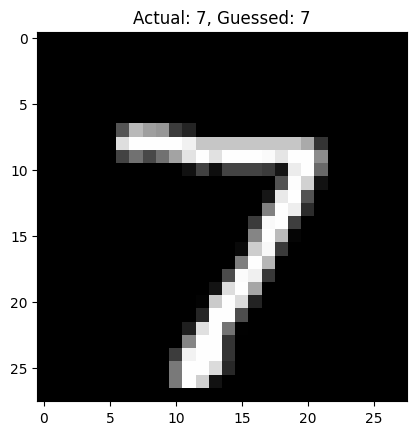

In [27]:
import matplotlib.pyplot as plt

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Actual: {actual_number}, Guessed: {guessed_number}")
plt.show()